# Plot Intro Figure


In [1]:
black=(0,0,0)
lightblue= (112/255.0,160/255.0,205/255.0)
orange=(196/255.0,121/255.0,0)
grey=(178/255.0,178/255.0,178/255.0)
darkblue=(0,52/255.0,102/255.0)
darkgreen=(0,79/255.,0)

black_shade = (128/255.0,128/255.0, 128/255.0)
lightblue_shade = (91/255.0, 174/255.0,178/255.0)
orange_shade = (204/255.0,174/255.0,113/255.0)
grey_shade = (191/255.0,191/255.0,191/255.0)
darkblue_shade = (67/255.0,147/255.0,195/255.0)
darkgreen_shade =(223/255.0, 237/255.0,195/255.0)

import xarray as xr
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy

import matplotlib.pyplot as plt

In [2]:
chl_weddellS= xr.open_dataset('../data/chl/CCI_ALL-v5.0-MONTHLY_snapshot.nc')  # larger spatial extent monthly average (dec/jan 2019/2020)
chl_weddell = xr.open_dataset('../data/chl/cci_weddell.nc') # time series

In [3]:
#argo data
argo1 = xr.open_dataset('../data/argo/argo_5904397.nc',decode_times=False)  # float data with lats and lons
argo1['chlor_a']=argo1.chla[:20,:].mean(dim='depth')
argo2 = xr.open_dataset('../data/argo/argo_5904467.nc',decode_times=False)
argo2['chlor_a']=argo2.chla[:20,:].mean(dim='depth')

In [4]:
# import polyline of sea ice maxima and minima
import shapefile   

# Load sea ice extent poplygons

fname1 = r'../../miz_export/data/seaice/extent/extent_S_201909_polyline_v3.0.'   
fname2 =  r'../../miz_export/data/seaice/extent/extent_S_202002_polyline_v3.0.'

gl1= xr.open_dataset('../data/seaglider/sg643/sg643_optics_gridded_29012021.nc')  # gridded glider products
gl2= xr.open_dataset('../data/seaglider/sg640/sg640_optics_30012021.nc')

Text(0.02, 0.85, 'b')

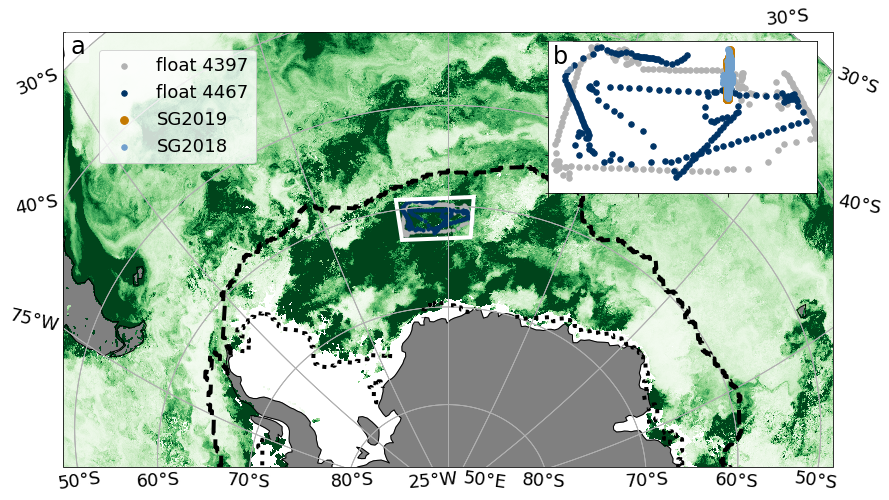

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib 
import matplotlib.colors as colors
import seaborn as sns
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams.update({'font.size': 18})
central_lon, central_lat = 0, -60
fig = plt.figure(figsize=(18,8))

ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))

ax.coastlines()
ax.gridlines()
# ax.set_global()
extent = [-50, 50, -30, -85]
ax.set_extent(extent)

plt.title('January 2020')
xx,yy = np.meshgrid(chl_weddellS.lon,chl_weddellS.lat)


ax.pcolormesh(xx,yy,(np.abs(chl_weddellS.chlor_a*2)).squeeze(),transform=ccrs.PlateCarree(),vmin=0.1, vmax=1.8,
                              cmap=plt.cm.Greens)

ax.add_patch(mpatches.Rectangle(xy=[-10, -63], width=15, height=4,
                                    facecolor='None',edgecolor='white',linewidth=4,
                                    alpha=1,transform=ccrs.PlateCarree()
                                    ))


ax.gridlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

ax.set_title('')

#Sea Ice extent 
# Max Extent 2019
sf = shapefile.Reader(fname1)
for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        listx = [i[0] for i in shape.shape.points[i_start:i_end]]
        listy = [i[1] for i in shape.shape.points[i_start:i_end]]
        ax.plot(listx,listy,transform=ccrs.SouthPolarStereo(),c='k', 
                linestyle='--',linewidth=4,label='Max Sea Ice Extent')

        
# Min Extent 2019
sf = shapefile.Reader(fname2)
for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        listx = [i[0] for i in shape.shape.points[i_start:i_end]]
        listy = [i[1] for i in shape.shape.points[i_start:i_end]]
        ax.plot(listx,listy,transform=ccrs.SouthPolarStereo(),c='k',
                linestyle='dotted',linewidth=4,label='Min Sea Ice Extent')
        
ax.add_feature(cartopy.feature.LAND, edgecolor='grey',facecolor='grey')


cs2=ax.scatter(argo2.lon,argo2.lat,color=grey,s=10,label='float 4397',transform=ccrs.PlateCarree())
cs2=ax.scatter(argo1.lon,argo1.lat,color=darkblue,s=10,label='float 4467',transform=ccrs.PlateCarree())

# inset axes....
axins = ax.inset_axes([0.63, 0.63, 0.35, 0.35],transform=ax.transAxes)
# axins = ax.inset_axes([-10, -63, 15, 4],transform=ax.transData)

cs2=axins.scatter(argo2.lon,argo2.lat,color=grey,s=30,label='float 4397')
cs2=axins.scatter(argo1.lon,argo1.lat,color=darkblue,s=30,label='float 4467')

axins.scatter(gl2.longitude[670:].values,gl2.latitude[670:].values,s=60,color = orange,label='SG2019')
axins.scatter(gl1.longitude.values,gl1.latitude.values,s=30,color=lightblue,label='SG2018')


# sub region of the original image
x1, x2, y1, y2 = -10, 5, -63 ,-59
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

axins.legend(bbox_to_anchor=(-1.05, 1))

# ax.indicate_inset_zoom(axins, edgecolor="black",facecolor='k', transform=ax.transData)
ax.text(0.01,0.95,'a',transform=ax.transAxes,fontsize=24,bbox=dict(facecolor='white', edgecolor='None',alpha=0.4))
axins.text(0.02,0.85,'b',transform=axins.transAxes,fontsize=24,bbox=dict(facecolor='white', edgecolor='None',alpha=0.4))

# plt.savefig('../results/figures/figure1a.png',dpi=150,bbox_inches='tight')

In [6]:
sea_ice_dataset  = xr.open_dataset('../data/seaice/seaice_subset_hr.nc')   # 0.1x0.1 deg sea ice concentration ** check resolution 
si_ds=sea_ice_dataset.sel(longitude=slice(-1,1),latitude=slice(-62,-59)).mean(dim='longitude')

Text(0.01, 0.93, 'd')

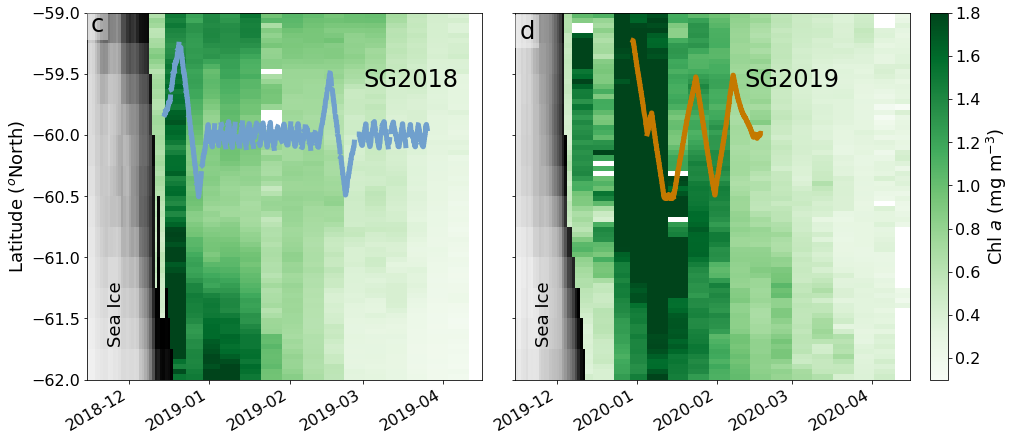

In [8]:
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams.update({'font.size': 18})

fig,ax=plt.subplots(1,2,figsize=[14,6],constrained_layout=True,sharey=True)

chl1_subset = ((chl_weddell.sel(lon=slice(-5,5),lat=slice(-59,-62)).mean(dim='lon'))).sel(time=slice('2018-10-15','2019-04-15'))
chl2_subset = ((chl_weddell.sel(lon=slice(-5,5),lat=slice(-59,-62)).mean(dim='lon'))).sel(time=slice('2019-10-15','2020-04-15'))
xx,yy= np.meshgrid(chl1_subset.time,chl1_subset.lat)
ax[0].pcolormesh(xx,yy,(np.abs(chl1_subset.chlor_a)*2).T,shading='auto',cmap=plt.cm.Greens,vmin=0.1,vmax=1.8)



ice_subset=si_ds.ice_conc.sel(time=slice('2018-11-15','2019-04-15')).T
ice_subset=ice_subset.where(ice_subset!=0,np.nan)
ice_subset.plot(cmap=plt.cm.Greys_r,ax=ax[0],add_colorbar=False,vmin=0,vmax=100)
ax[0].plot(gl1.time.values[::1],gl1.latitude[::1],lw=5,c=lightblue)
ax[0].text(0.7,0.8,'SG2018',transform=ax[0].transAxes,fontsize=24)

xx,yy= np.meshgrid(chl2_subset.time,chl2_subset.lat)
cs=ax[1].pcolormesh(xx,yy,(np.abs(chl2_subset.chlor_a*2).T),shading='auto',cmap=plt.cm.Greens,vmin=0.1,vmax=1.8)

cbar=plt.colorbar(cs,ax=ax[1])
cbar.set_label('Chl $\it{a}$ (mg m$^{-3}$)')

ax[1].plot(gl2.time.values[670:][::1],gl2.latitude[670:][::1],lw=5,c=orange)
ax[1].text(0.58,0.8,'SG2019',transform=ax[1].transAxes,fontsize=24)

ice_subset=si_ds.ice_conc.sel(time=slice('2019-11-15','2020-04-15')).T
ice_subset=ice_subset.where(ice_subset!=0,np.nan)
ice_subset.plot(cmap=plt.cm.Greys_r,ax=ax[1],add_colorbar=False,vmin=0,vmax=100)

ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[0].set_xlabel('')
ax[0].set_ylabel('Latitude (${^o}$North)')

ax[0].text(0.05,0.1,'Sea Ice',transform=ax[0].transAxes,rotation=90)
ax[1].text(0.05,0.1,'Sea Ice',transform=ax[1].transAxes,rotation=90)

ax[0].text(0.01,0.95,'c',transform=ax[0].transAxes,fontsize=24,bbox=dict(facecolor='white', edgecolor='None',alpha=0.4))
ax[1].text(0.01,0.93,'d',transform=ax[1].transAxes,fontsize=24,bbox=dict(facecolor='white', edgecolor='None',alpha=0.4))

# plt.savefig('../results/figures/figure1b.png',dpi=150,bbox_inches='tight')